In [ ]:
!pip install transformers datasets sentencepiece


In [3]:
with open("reviews.txt", "r", encoding="utf-8") as f:
    reviews = f.readlines()

print("Total Reviews:", len(reviews))

print("\nSample Reviews:\n")
for i in range(6):
    print(f"Review {i+1}:\n", reviews[i][:300], "\n")


Total Reviews: 100

Sample Reviews:

Review 1:
 I've started using infloso app for a while now and I found it to be really interesting and a fun app to have a social media impact and gives a lot of opportunities for one to connect with brands and improve their social media presence.
 

Review 2:
 Worst application. It doesn't let me connect my Instagram neither my YouTube. Nothing works.
 

Review 3:
 I have an Instagram family of close to 70K followers still your can't find me there? How do I connect my Instagram?
 

Review 4:
 Bahut hi vdiya app hai chote mote creator ko bi collaborate krne ka moka deta hai aur earn krne ka jisse jo new creator influencer hai mere jaise unko moka milta hai aur ummed jagti hai but followers target thoda kam hota to aur jada better hota aur jo male creator hai usko female creator wale bi co 

Review 5:
 YouTube username. hey I'm unable to add my YouTube username.when ever i add it's telling wrong.plz tell me how to add YouTube username and where I can 

In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^\w\s.,!?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

cleaned_reviews = [clean_text(r) for r in reviews if len(r.strip()) > 20]

print("Usable Reviews After Cleaning:", len(cleaned_reviews))


Usable Reviews After Cleaning: 89


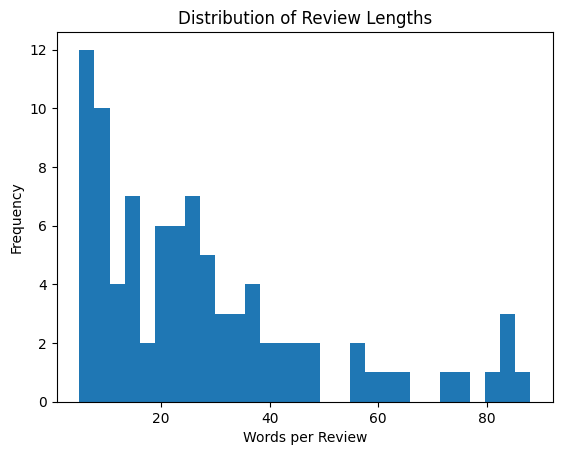

In [5]:
import matplotlib.pyplot as plt

lengths = [len(r.split()) for r in cleaned_reviews]

plt.hist(lengths, bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel("Words per Review")
plt.ylabel("Frequency")
plt.show()


In [6]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [8]:
def summarize(text):
    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(
        inputs,
        num_beams=4,
        max_length=120,
        min_length=30,
        early_stopping=True
    )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


In [9]:
sorted_reviews = sorted(cleaned_reviews, key=len, reverse=True)
top5_reviews = sorted_reviews[:5]

top5_summaries = [summarize(r) for r in top5_reviews]

for i in range(5):
    print(f"\n--- Review {i+1} Summary ---")
    print(top5_summaries[i])



--- Review 1 Summary ---
i m a software developer and being professional this app has the worst ux i ve ever experienced. i m a software developer and being professional this app has the worst ux i ve ever experienced.

--- Review 2 Summary ---
the infloso app is a game changer!firstly, the user interface is clean and intuitive. the task management features are top notch.

--- Review 3 Summary ---
worst app ever doesn t deserve a single star. i can contact no person through any means. will definitely not recommend anyone about this app wasted my time.

--- Review 4 Summary ---
infloso is a great application this app provide us branded products peoples see the video of product for better results the influencers of this application show the product quality in detail the workers of this app work fastly for you and they do a great job infloso app team is dedicated to providing a great service.

--- Review 5 Summary ---
infloso is an exceptional paid barter collaboration app that has revol

In [13]:
from datasets import load_metric

rouge = load_metric("rouge")

scores = rouge.compute(
    predictions=top5_summaries,
    references=top5_reviews
)

print(scores)


ImportError: cannot import name 'load_metric' from 'datasets' (/usr/local/lib/python3.12/dist-packages/datasets/__init__.py)

In [14]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


In [16]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=612732afdc68c53de99c27240e4bbebe4b0566f161c7be931141cf51a6dbdf33
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [17]:
import evaluate

rouge = evaluate.load("rouge")

scores = rouge.compute(
    predictions=top5_summaries,
    references=top5_reviews
)

print(scores)


{'rouge1': np.float64(0.5373137119348375), 'rouge2': np.float64(0.49404923914388227), 'rougeL': np.float64(0.5084679574816063), 'rougeLsum': np.float64(0.5084679574816063)}
